In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

Read data

In [3]:
data = pd.read_csv('USA_Housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
data.head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [7]:
data[data.isna().any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


The dataset consists of 5000 addresses with their respetive area-level information, such as income level, age of the houses, size of the houses, population and price. 

# EDA

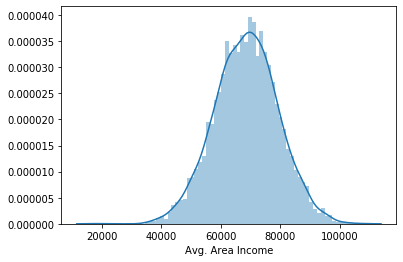

In [16]:
sb.distplot(data['Avg. Area Income'], bins=70)

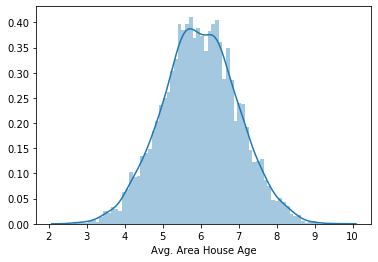

In [17]:
sb.distplot(data['Avg. Area House Age'], bins=70)

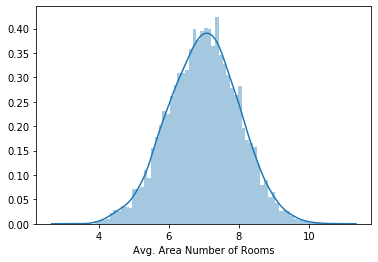

In [18]:
sb.distplot(data['Avg. Area Number of Rooms'], bins=70)

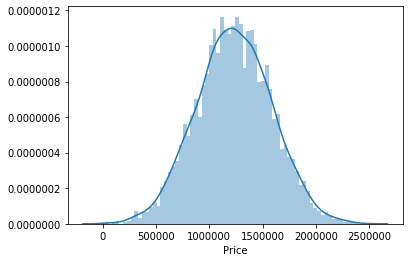

In [21]:
sb.distplot(data['Price'], bins=70)

Key variables seem to be following the normal distribution. Can do some linear regression analysis and apply supervised learning linear regression machine learning algorithm. Before that, some more data visualization. 

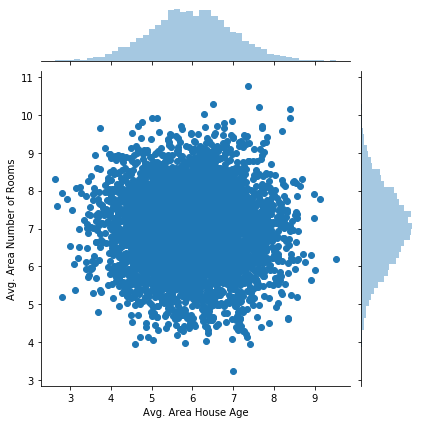

In [22]:
#whether older houses are bigger and thus more expensive everywhere?
sb.jointplot(data=data, x='Avg. Area House Age', y='Avg. Area Number of Rooms')
#no clear correlation

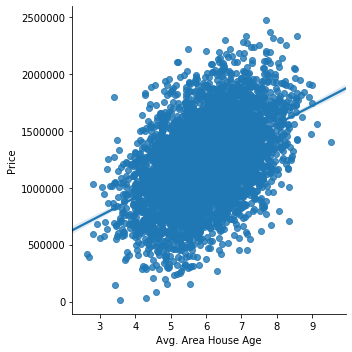

In [26]:
#anything age has to do with price?
sb.lmplot(data=data, x='Avg. Area House Age', y='Price')
#yes, seems that la little bit

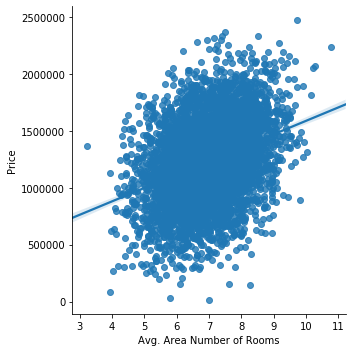

In [25]:
#anything size has to do with price?
sb.lmplot(data=data, x='Avg. Area Number of Rooms', y='Price')
#yes, seems that la little bit too.

House age and and house size have a positive correlation with prices. But older houses, do not necessarily mean larger houses, so the former effects seems to be working separately. 

Now, noticing that it is possible to extract info about the states, will do that, and then do some analysis around that.

In [45]:
new = data["Address"].str.split(",", n = 1, expand = True) 
data["Address2"]= new[1]
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Address2
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE 37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA 48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI 06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,None
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,None


In [48]:
new = data["Address2"].str.split(" ", n = 2, expand = True) 
data["State"]= new[1]
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Address2,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE 37010-5101,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA 48958,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI 06482-3489,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,None,None
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,None,None


In [53]:
data['State'].value_counts().head()
#will remove those with "box", as they seem to be refering to the military addresses

Box    167
OR      91
GU      91
DE      89
KY      89
Name: State, dtype: int64

In [56]:
data.loc[data['State'] == "Box", 'State'] = None
data['State'].value_counts().head()

OR    91
GU    91
KY    89
DE    89
NC    89
Name: State, dtype: int64

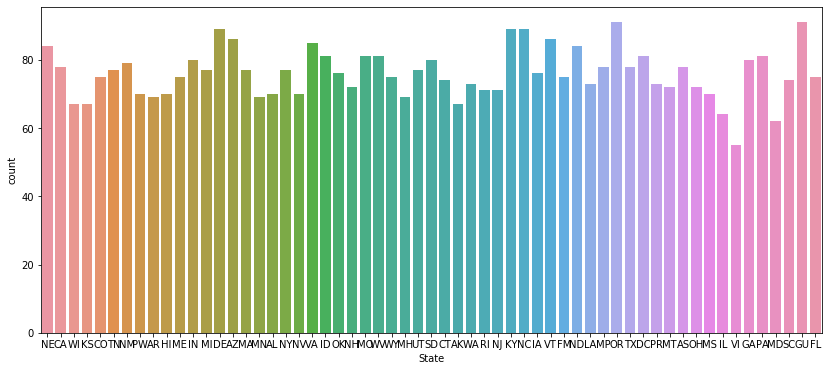

In [61]:
plt.figure(figsize=(14,6))
sb.countplot(data=data,x='State')

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

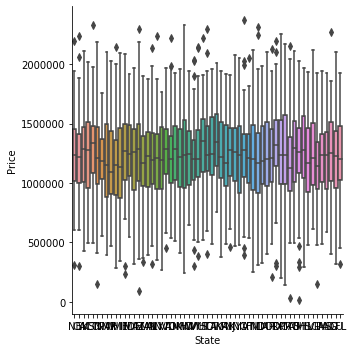

<Figure size 1008x432 with 0 Axes>

In [65]:
sb.catplot(x="State", y="Price", kind="box", data=data)


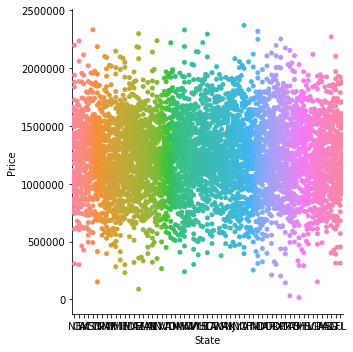

In [66]:
sb.catplot(x="State", y="Price", kind="swarm", data=data)

Analysis by a random state

In [70]:
data['Random_score'] = np.random.randint(0,5000,size=(len(data),1))
data[data['Random_score']==1]['State']

294       VT
2539    None
Name: State, dtype: object

Randomly chosen state - vermonth

In [73]:
data['map'] = np.where(data['State']=='VT',1,0)
data['map'].value_counts()

0    4914
1      86
Name: map, dtype: int64

In [95]:
data2 = dict(type='choropleth',
            colorscale = '#8dd3c7',
            reversescale = False,
            locations = data['State'],
            z = data['map'],
            locationmode = 'USA-states',
            showscale = False,
            marker = dict(line = dict(color = 'rgb(15, 15, 55)',width = 1))
            ) 
layout2 = dict(title = 'Vermonth on the map',
              geo = dict(scope='usa',
                         showlakes = False,
                         lakecolor = 'rgb(216.0, 226.0, 25.0)')
             )

In [96]:
choromap = go.Figure(data = [data2],layout = layout2)
iplot(choromap,validate=False)

In [101]:
df_vt = data[data['State'] == 'VT']

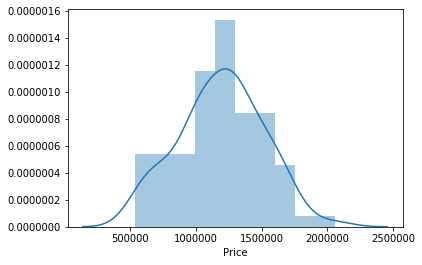

In [113]:
sb.distplot(df_vt['Price'], bins=10)

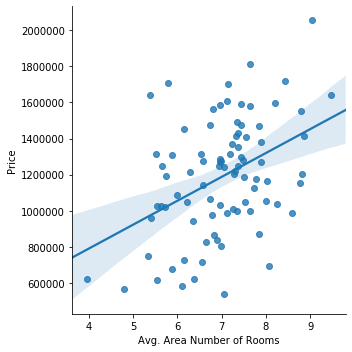

In [115]:
sb.lmplot(data=df_vt, x='Avg. Area Number of Rooms', y='Price')

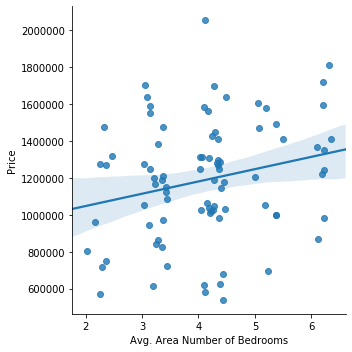

In [116]:
sb.lmplot(data=df_vt, x='Avg. Area Number of Bedrooms', y='Price')

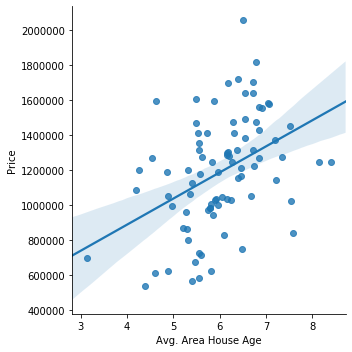

In [117]:
sb.lmplot(data=df_vt, x='Avg. Area House Age', y='Price')

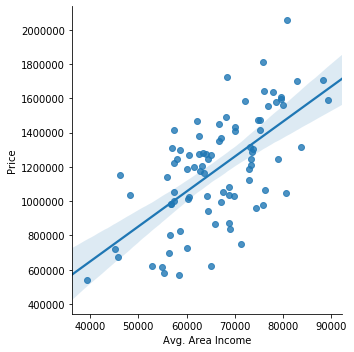

In [118]:
sb.lmplot(data=df_vt, x='Avg. Area Income', y='Price')

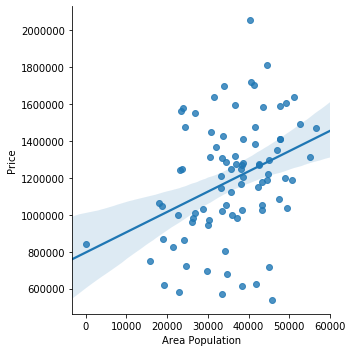

In [121]:
sb.lmplot(data=df_vt, x='Area Population', y='Price')

For Vermonth, the mean price for houses is similar to the whole sample. Although noisier, the number of rooms/bedrooms, house age, income and area population are also is positively correlated to the price. 

It would be interesting to know, while most stuff in the dataset are positively correlated with the price, which components have the strongest correlation.

# PCA

In [134]:
#obvious way of looking into correlation is the correlation matrix
#data = data.drop(['Random_score','map'],axis=1)
data.head()
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


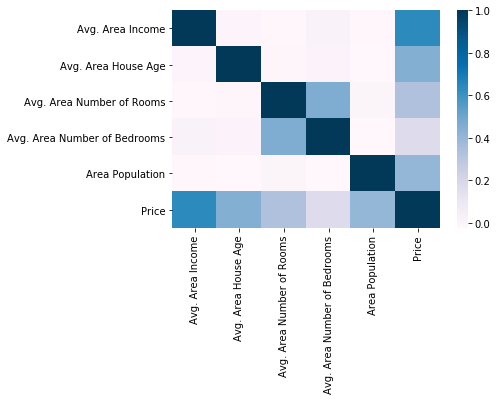

In [143]:
sb.heatmap(data.corr(),cmap='PuBu')

From the heatmap, the price is the most correlated with area income and then house age. What does PCA say:

In [170]:
#firstly, will scale the data, since income, population, number of rooms are different size data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#make sure the data we will scale does not contain string variables and no target variable
data_nostr = data.drop(['Address','Address2','State','Price'],axis=1)
scaler.fit(data_nostr)
scaled_data = scaler.transform(data_nostr)

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #will try with 2 components first and see if it is indeed just the income age, and population variables
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [172]:
scaled_data.shape

(5000, 5)

In [173]:
#as it can be seen below, pca reduced the dataset to 2 factors instead of 6.
x_pca.shape

(5000, 2)

Text(0, 0.5, 'Second Principal Component')

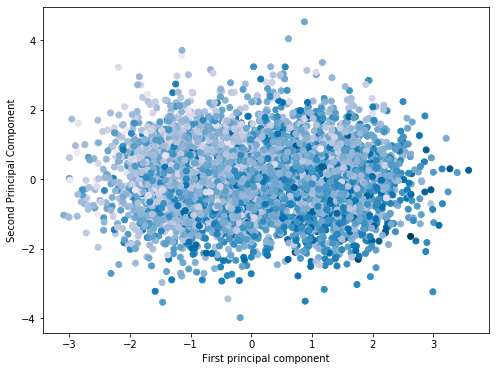

In [177]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Price'],cmap='PuBu')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

It is hard to see how principle components explain Price variations. Let's look at the numbers instead. I think this also suggest there should be more components.

In [181]:
data_nostr.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [179]:
pca.components_

array([[ 0.01450549, -0.0037869 ,  0.70606912,  0.70730112, -0.03109292],
       [-0.46244297, -0.5229948 ,  0.0597233 , -0.02158524,  0.71315507]])

In [182]:
df_comp = pd.DataFrame(pca.components_,columns=data_nostr.columns)
df_comp

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.014505,-0.003787,0.706069,0.707301,-0.031093
1,-0.462443,-0.522995,0.059723,-0.021585,0.713155


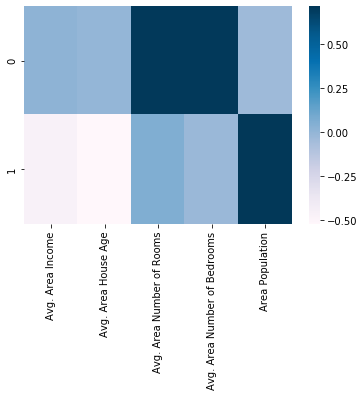

In [183]:
sb.heatmap(df_comp,cmap='PuBu')

The heatmap suggests that the first component is correclated with number of rooms variable with some mix of income. The second component is largery correlated with population. What if the process took more components?

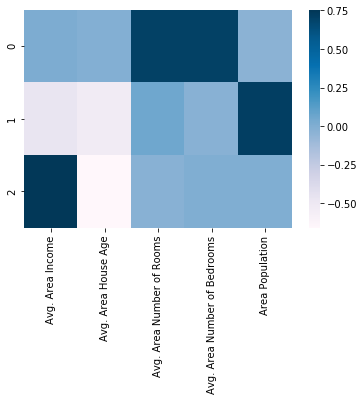

In [184]:
pca = PCA(n_components=3) 
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
df_comp = pd.DataFrame(pca.components_,columns=data_nostr.columns)
sb.heatmap(df_comp,cmap='PuBu')

A somewhar productive attemp in trying with 3 components, since then income is also put in the mix, and basic correlations already have shown that area income is largely correlated with price.

Final step is to apply the linear regression machine learning algorith to see if this model will fit and whether we can run a regression and use the results to explain the causal relationship between the price and the explanatory variables.

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [195]:
#split the data
X = data.drop(['Price','Address','Address2','State'],axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [196]:
lr = LinearRegression()

In [197]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
predict = lr.predict(X_test)

Text(0, 0.5, 'Price from the data')

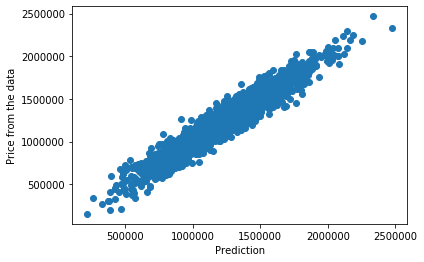

In [212]:
plt.scatter(predict,y_test)
plt.xlabel('Prediction')
plt.ylabel('Price from the data')

From the graph above, it seems like a linear way is a good way in explaining changes in price. So let's run a linear regression and obtain the coefficients.

In [218]:
import statsmodels.api as sm
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.702e+04
Date:                Fri, 23 Aug 2019   Prob (F-statistic):                        0.00
Time:                        17:26:30   Log-Likelihood:                         -69078.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Hence, else kept constant:
- a unit increase in the average area income will increase the price of the house by 10 USD, result is statistically significant at 99%.
- a unit increase in the average area house age will increase the price of the house by 51,300USD, result is statistically significant at 99%.
- a unit increase in the average area number of rooms will decrease the price of the house by 9,6145USD, result is statistically significant at 97%.
- a unit increase in the average area number of bedrooms will increase the price of the house by 4,082USD, not a statistically significant result.
- a unit increase in the average area population will increase the price of house by 8USD, result is statistically significant at 99%.

This brings to a conclusion, as it is expected, with time real estate becomes expensive, and if things next year are the same as they were when the dataset was collected, then the later a new house is bought, the more expensive it will be.